# Analiza rozkładów prawdopobieństwa

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

## Zadanie - rozkład dyskretny
Zmienna losowa $X$ ma funkcje prawdopodobieństwa nastepującej postaci:

| $x_i$ | -3  | -1  | 3   | 5   |
|-------|-----|-----|-----|-----|
| $p_i$ | 0.1 | 0.2 | 0.5 | 0.2 |


a) Narysuj wykres rozkładu prawdopodobieństwa.

*b) Narysuj dystrybuante $F$ tego rozkładu.

c) Oblicz prawdopodobieństwa $P(X > 1)$ i $P( \frac{1}{4} < X < 5)$.

d) Oblicz wartość oczekiwaną, wariancję i odchylenie standardowe zmiennej X.

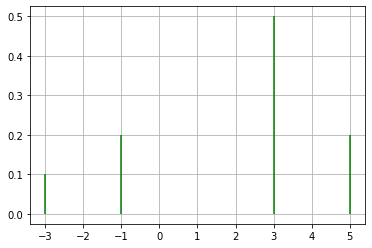

In [11]:
# a)

x = [-3, -1, 3, 5]
p = [0.1, 0.2, 0.5, 0.2]

#plt.scatter(x=x, y=p, color='b')
plt.vlines(x = x, ymin=0, ymax=p, colors='g')
plt.grid()
plt.show()

In [15]:
%%time
ln = len(p)
lst = [0] * ln
val = 0

for i in range(ln):
    val += p[i]
    lst[i] = val

lst

CPU times: user 35 µs, sys: 8 µs, total: 43 µs
Wall time: 53.2 µs


[0.1, 0.30000000000000004, 0.8, 1.0]

In [17]:
%%time
lst = []
val = 0

for elem in p:
    val += elem
    lst.append(val)

lst

CPU times: user 14 µs, sys: 3 µs, total: 17 µs
Wall time: 20.7 µs


[0.1, 0.30000000000000004, 0.8, 1.0]

In [18]:
%%time
list(np.cumsum(p))

CPU times: user 42 µs, sys: 10 µs, total: 52 µs
Wall time: 56.5 µs


[0.1, 0.30000000000000004, 0.8, 1.0]

In [15]:
# b)

# F(x) = P(X <= x) = sum p_i po x_i <= x

F = list(np.cumsum(p))
x_lim = list(x)

In [16]:
print(F)
print(x_lim)

[0.1, 0.30000000000000004, 0.8, 1.0]
[-3, -1, 3, 5]


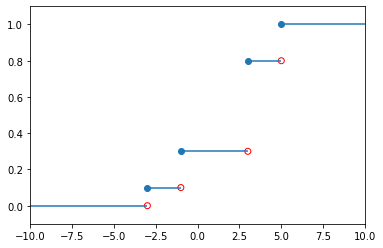

In [31]:
plt.scatter(x, F)
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)

x_lim = [-10] + list(x) + [10]
f = [0] + F
plt.scatter(x, f[:-1], facecolors = 'none', edgecolors='r')

for i in range(len(x_lim) - 1):
    plt.hlines(xmin=x_lim[i], xmax=x_lim[i+1], y = f[i])

In [ ]:
# c)

# F(x) = P(X <= x)
# P(X > x) = 1 - F(x)

# P(X > 1) = P(X = 3) + P(X=5) = 0.7
# P(X > 1) = 1 - F(1)

#P(0.25 < X < 5) = P(X = 3) = 0.5

In [37]:
# d) 


# EX = suma x* p
x = np.array([-3, -1, 3, 5])
p = np.array([0.1, 0.2, 0.5, 0.2])


ex = np.sum(x * p)
print(ex)

# Var(X) = EX^2 - (EX)^2
# EX^2 = suma X^2 * p

ex2 = np.sum(x ** 2 * p)
print(ex2)

var = ex2 - ex ** 2
print(var)

std = np.sqrt(var)
print(std)

2.0
10.6
6.6
2.569046515733026


## ***Zadanie - rozkład ciągły
Zmienna losowa X ma rozkład ciągły o gęstości:

$$
    f(x)=\left.
    \begin{cases}
    x \quad &\text{dla}\quad 0<x\leq 1\\
    2-x \quad &\text{dla}\quad 1<x\leq 2\\
    0 \quad &\text{dla}\quad x>2, x\le 0.
    \end{cases}\right.
$$


a) Narysuj wykres gęstości.

b) Wyznacz narysuj dystrybuante $F$ tego rozkładu.

c) Oblicz prawdopodobieństwa $P(X > 1)$ i $P( \frac{1}{4} < X \leq 1)$.

d) Oblicz wartość oczekiwaną, wariancję i odchylenie standardowe zmiennej X.

In [ ]:
# a

In [44]:
f = lambda x: x if x > 0 and x <= 1 else 2 - x if x > 1 and x <= 2 else 0

In [46]:
f(1)

1

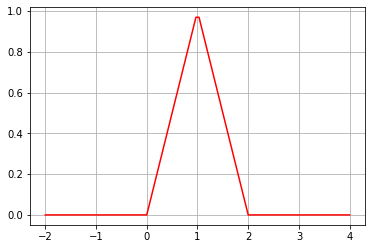

In [52]:
x = np.linspace(-2,4,100)
y = [f(elem) for elem in x]
plt.plot(x,y, 'r')
plt.grid()
plt.show()

In [67]:
#b

In [65]:
import scipy.integrate as integrate
F = lambda x: integrate.quad(f, -np.inf, x)[0]

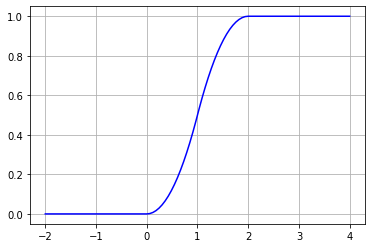

In [66]:
x = np.linspace(-2,4,100)
y = [F(elem) for elem in x]
plt.plot(x,y, 'b')
plt.grid()
plt.show()

In [68]:
#c

In [69]:
1 - F(1)

0.5

In [70]:
F(1) - F(0.25)

0.46874999997455197

In [71]:
#d

In [74]:
EX = integrate.quad(lambda x: f(x)*x, -np.inf, np.inf)[0]
EX

1.0000000000000033

In [77]:
Var = integrate.quad(lambda x: f(x)*(x-EX) ** 2, -np.inf, np.inf)[0]
Var

0.16666666666665894

In [80]:
Sigma = np.sqrt(Var)
Sigma

0.4082482904638536